In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simulator.helpers import SimulationParameters
from data_analysis.helpers import *

In [11]:
svip_base_dict = {
    "fwd_pol": "svip",
    "cache_pol": "svip",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5,),
    "cache_read_rates": (50,),
    "cache_write_rates": (50,),
    "cache_read_pens": (2,),
    "cache_write_pens": (4,),
}
svip_base_params = SimulationParameters(**svip_base_dict)
svip_cache_caps = [(6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,)]
svip_param_list = getParamList(svip_base_params, "cache_capacities", svip_cache_caps)
svip_param_hashes = getParamHashList(svip_param_list)

mvip_base_dict = {
    "fwd_pol": "mvip",
    "cache_pol": "mvip",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5,100),
    "cache_read_rates": (50,10),
    "cache_write_rates": (50,10),
    "cache_read_pens": (2,1),
    "cache_write_pens": (4,2),
}
mvip_base_params = SimulationParameters(**mvip_base_dict)
mvip_cache_caps = [(5,10), (5, 20), (5,30), (5, 40), (5,50), (5, 60), (5,70), (5, 80), (5,90), (5, 100)]
mvip_param_list = getParamList(mvip_base_params, "cache_capacities", mvip_cache_caps)
mvip_param_hashes = getParamHashList(mvip_param_list)

In [12]:
svip_db = getJsonDb("/home/volkan/Repos/multi-tier/sim_outputs/svip_abilene_db.json")
svip_delay = getDataFieldSumsAcrossEntries('abilene',svip_db,svip_param_hashes,'delay')
mvip_db = getJsonDb("/home/volkan/Repos/multi-tier/sim_outputs/mvip_abilene_db.json")
mvip_delay = getDataFieldSumsAcrossEntries('abilene',mvip_db,mvip_param_hashes,'delay')

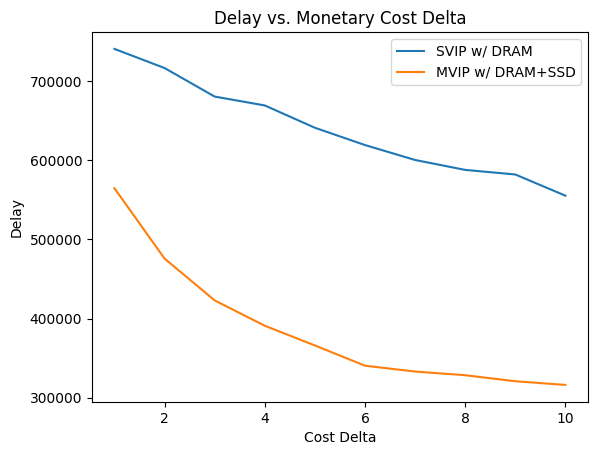

In [13]:
cost_delta = list(range(1, 11))

plt.plot(cost_delta, svip_delay, label="SVIP w/ DRAM")
plt.plot(cost_delta, mvip_delay, label="MVIP w/ DRAM+SSD")

plt.title("Delay vs. Monetary Cost Delta")
plt.xlabel("Cost Delta")
plt.ylabel("Delay")

plt.legend()
plt.show()